In [41]:
"""This is a quick analysis on NYC voter registration numbers by Counties with data from the 2016 Census
estimates and the Board of Elections

Voter Registration Dataset – http://www.elections.ny.gov/enrollmentcounty.html

opulation Data from 2016 Census Bureau Estimates (Posted by the Department of Labor) - 
https://data.ny.gov/Government-Finance/Annual-Population-Estimates-for-New-York-State-and/krt9-ym2k/data"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

%matplotlib inline

plt.style.use('ggplot')
pd.set_option('precision', 2)

In [3]:
# November 2017 voter enrollment data
# Data goes back to 2008

files = ['enrollment11012017.txt'] 

"""
REGION  Region1 COUNTY STATUS DEM    REP    IND   CON   WOR GRE LBT RTH SWP BLANK  TOTAL
Outside NYC     Albany Active 85,226 40,864 7,084 2,687 482 560 21  0   0   37,097 174,021
"""
columns = ['REGION1', 'REGION2', 'COUNTY', 'STATUS', 'DEM', 'REP', 'IND', 'CON', 'WOR', 'GRE', 'LBT', 'RTH', 'SWP', 'BLANK', 'TOTAL']

df = pd.concat([pd.read_csv("data/enrollment/" + file, names=columns, delimiter = " ") for file in files])

In [4]:
df = df[(df.REGION1) == "Within"]

In [5]:
df.drop(['REGION1', 'REGION2', 'DEM', 'REP', 'IND', 'CON', 'WOR', 'GRE', 'LBT', 'RTH', 'SWP', 'BLANK'], axis=1, inplace=True)

In [6]:
df.reset_index(drop=True, inplace=True)
df

,COUNTY,STATUS,TOTAL
0,Bronx,Active,"718,302"
1,Bronx,Inactive,"87,080"
2,Bronx,Total,"805,382"
3,Kings,Active,"1,434,091"
4,Kings,Inactive,"126,748"
5,Kings,Total,"1,560,839"
6,NewYork,Active,"1,001,014"
7,NewYork,Inactive,"149,357"
8,NewYork,Total,"1,150,371"
9,Queens,Active,"1,154,262"


In [7]:
df.dtypes

COUNTY    object
STATUS    object
TOTAL     object
dtype: object

In [8]:
df.TOTAL = df.TOTAL.map(lambda x: x.replace(",", ""))
df.COUNTY = df.COUNTY.map(lambda x: x.replace("NewYork", "Manhattan"))
df.COUNTY = df.COUNTY.map(lambda x: x.replace("Kings", "Brooklyn"))
df.COUNTY = df.COUNTY.map(lambda x: x.replace("Richmond", "Staten Island"))
df.TOTAL = df.TOTAL.astype(int)

In [9]:
print(df, "\n\n", df.dtypes)

           COUNTY    STATUS    TOTAL
0           Bronx    Active   718302
1           Bronx  Inactive    87080
2           Bronx     Total   805382
3        Brooklyn    Active  1434091
4        Brooklyn  Inactive   126748
5        Brooklyn     Total  1560839
6       Manhattan    Active  1001014
7       Manhattan  Inactive   149357
8       Manhattan     Total  1150371
9          Queens    Active  1154262
10         Queens  Inactive    74760
11         Queens     Total  1229022
12  Staten Island    Active   289144
13  Staten Island  Inactive    19084
14  Staten Island     Total   308228
15          Total    Active  4596813
16          Total  Inactive   457029
17          Total     Total  5053842 

 COUNTY    object
STATUS    object
TOTAL      int64
dtype: object


In [10]:
df2 = df.pivot(index='COUNTY', columns='STATUS', values='TOTAL')


In [11]:
"""
Data from Ann. Population Estimates:
pop = {'Bronx': 1455720,
       'Brooklyn': 2629150,
       'Manhattan': 1643734,
       'Queens': 2333054,
       'Staten Island': 476015,
       'Total': 8537673}""";

df2["Population"] = [1455720, 2629150, 1643734, 2333054, 476015, 8537673]
df2["Unregistered"] = df2.Population - df2.Total
df2["Pct_Unregistered"] = df2.Unregistered / df2.Population
df2

STATUS,Active,Inactive,Total,Population,Unregistered,Pct_Unregistered
COUNTY,,,,,,
Bronx,718302,87080,805382,1455720,650338,0.45
Brooklyn,1434091,126748,1560839,2629150,1068311,0.41
Manhattan,1001014,149357,1150371,1643734,493363,0.30
Queens,1154262,74760,1229022,2333054,1104032,0.47
Staten Island,289144,19084,308228,476015,167787,0.35
Total,4596813,457029,5053842,8537673,3483831,0.41


In [12]:
df3 = df2[:5];
df4 = df3.sort_values(by="Unregistered", ascending=True)

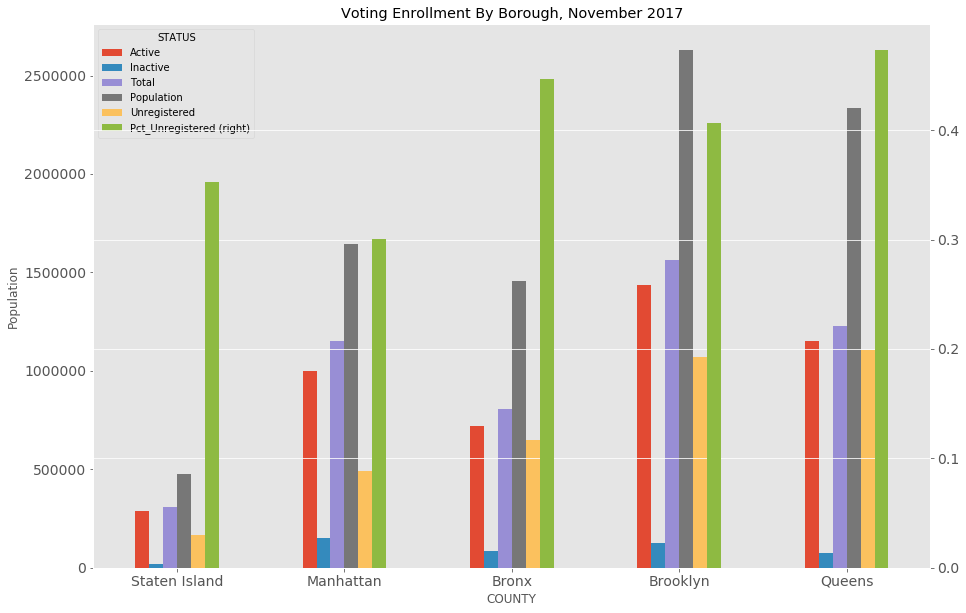

In [40]:
ax = df4.plot(secondary_y="Pct_Unregistered", title="Voting Enrollment By Borough, November 2017",
         kind='bar', rot=0, figsize=(15, 10), fontsize=14)
ax.set(ylabel="Population")
plt.show()